In [11]:
import pandas as pd
import nltk 
import random
import re
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

In [4]:
df = pd.read_csv('IMDB Dataset.csv',encoding='Latin-1')
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

Δίνουμε τιμή 1 για τα θετικά και 0 για να αρνητικά

In [8]:
stopwords = set(nltk.corpus.stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

Ορίζουμε stopwords και lemmatizer αντικείμενο για να επεξεργαστούμε το κείμενο

<h2>Φάση Προεπεξεργασίας Δεδομένων</h2>

***
<b>Συνάρτηση που αφαιρεί τα HTML tags</b>

Η μέθοδος `get_text` αφαιρεί τα HTML tags και επιστρέφει μόνο το κείμενο.

Με `strip=True` επιστρέφει χωρίς κενά πίσω

In [10]:
def html_clean(text):
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text()

In [18]:
def text_clean(text):
    text = html_clean(text)
    text = re.sub(r'[^A-Za-z0-9]+',' ',text) #Ότι δεν είναι κείμενο η αριθμός κόβεται
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token,"v") for token in text]
    text = [word for word in text if not word in stopwords]
    text = " ".join(text)
    return text

In [21]:
df['Processed_Reviews'] = df.review.apply(lambda x: text_clean(x))

<b>Πως ήταν το κείμενο πριν την επεξεργασία</b>

In [30]:
df.review[14]

"This a fantastic movie of three prisoners who become famous. One of the actors is george clooney and I'm not a fan but this roll is not bad. Another good thing about the movie is the soundtrack (The man of constant sorrow). I recommand this movie to everybody. Greetings Bart"

<b>Πως κατέληξε μετά απο την επεξεργασία</b>

In [28]:
df['Processed_Reviews'][14]

'fantastic movie three prisoner become famous one actor george clooney fan roll bad another good thing movie soundtrack man constant sorrow recommand movie everybody greet bart'

***
<h2>Φάση Classification</h2>

In [32]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_reporteport

In [33]:
x = df['Processed_Reviews']
y = df['sentiment']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

To train_test_split χωρίζει έναν πίνακα σε train και test sets<br>
To test_size συμβολίζει ότι το 20% θα πάει σε test και το 80% σε training<br>
x = Πίνακας, y = Options

***
<h3>Support Vector Machines</h3>

In [37]:
count_vect = CountVectorizer().fit(df['Processed_Reviews'].values.astype('U'))
bow_train = count_vect.transform(X_train.values.astype('U'))
bow_test = count_vect.transform(X_test.values.astype('U'))

To astype('U') λέει να μετατράπουν τα δεδομένα σε Unicode

In [38]:
SVM = SVC()

SVM.fit(bow_train,y_train)

predicted_SVM = SVM.predict(bow_test)

In [43]:
print(classification_report(y_test, predicted_SVM))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5035
           1       0.86      0.89      0.87      4965

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



***
<h3>Gaussian μορφή του Naive Bayes</h3>

In [65]:
from sklearn.naive_bayes import GaussianNB
bow_train_NB = count_vect.transform(X_train).toarray()
bow_test_NB = count_vect.transform(X_test).toarray()
NB = GaussianNB()
NB.fit(bow_train_NB,y_train)

GaussianNB()

In [66]:
predicted_NB = NB.predict(bow_test_NB)
print(classification_report(y_test, predicted_NB))

              precision    recall  f1-score   support

           0       0.61      0.85      0.71      5035
           1       0.74      0.45      0.56      4965

    accuracy                           0.65     10000
   macro avg       0.68      0.65      0.63     10000
weighted avg       0.68      0.65      0.63     10000



***
<h3>Πολυωνυμική μορφή του Naive Bayes</h3>

In [69]:
from sklearn.naive_bayes import MultinomialNB
M_NB = MultinomialNB()
M_NB.fit(bow_train,y_train)

predicted_M_NB = M_NB.predict(bow_test_NB)

MultinomialNB()

In [72]:
print(classification_report(y_test, predicted_M_NB))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5035
           1       0.87      0.83      0.85      4965

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



***
<h3>K-Nearest Neighbors</h3>

In [75]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()
KN.fit(bow_train,y_train)

KNeighborsClassifier()

In [77]:
predictedKN = KN.predict(bow_test_NB)
print(classification_report(y_test, predictedKN))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      5035
           1       0.65      0.63      0.64      4965

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



***
<h4>Γραφική Αναπαράσταση</h4>

<BarContainer object of 4 artists>

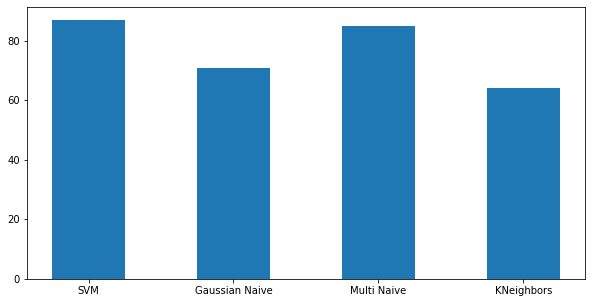

In [83]:
import matplotlib.pyplot as plt
data = {'SVM':87,'Gaussian Naive':71,'Multi Naive':85,'KNeighbors':64}
algs = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(algs,values,width=0.5)